<a href="https://colab.research.google.com/github/AlejandroGutie/G04-ME04-Avance-Monografia/blob/main/ME04_Desnutrici%C3%B3n_e_inseguridad_alimentaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminario de Analítica y Ciencia de Datos
### Momento Evaluativo 04
## _Aplicación de Ciencia de datos sobre la desnutrición e inseguridad alimentaria en los municipios de Antioquia en el marco del segundo Objetivo de Desarrollo Sostenible, 2013 - 2022_

**Grupo 04**\
Huberth Rolando Hincapié Arango\
Yeisson Alejandro Gutiérrez Cano

# Herramientas

## Librerías

In [91]:
# Datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt

# Matemáticas y estadísticas
# ==============================================================================
import math
from collections import Counter

# Exportar datos
# ==============================================================================
from google.colab import files



# Procesamiento de datos

## Importación de datos desde repositorio de GitHub

In [92]:
# Se importan los datos directamente desde el repositorio de Github
# En este caso los datos que contienen los valores para los indicadores de Incidencia de desnutrición aguda en población menor de 5 años
# y el indicador de Prevalencia de inseguridad alimentaria en el hogar (moderada o severa)
Indicators = pd.read_csv('https://raw.githubusercontent.com/AlejandroGutie/G04-ME04-Avance-Monografia/main/Indicadoresdesnutricioneinseguridadalimentaria.csv')

# Visualización del conjunto de datos
Indicators


,Desagregación,Código subregión,Subregión,Código entidad,Entidad,Pilar,Número ODS,Nombre ODS,Número meta,Nombre meta,Número indicador,Indicador,Valor,Numerador,Denominador,Año,Fuente,Unidad de medida
0,Municipal,SR08,Suroeste,5091,Betania,Personas,2,Hambre cero,2.1,Acceso universal a alimentos seguros y nutrici...,2.1.1.P,Prevalencia de inseguridad alimentaria en el h...,9.811121,281.735355,2871.591928,2017,DAP - Departamento Administrativo de Planeació...,Porcentaje
1,Municipal,SR08,Suroeste,5368,Jericó,Personas,2,Hambre cero,2.1,Acceso universal a alimentos seguros y nutrici...,2.1.1.P,Prevalencia de inseguridad alimentaria en el h...,4.609214,212.530844,4611.000000,2017,DAP - Departamento Administrativo de Planeació...,Porcentaje
2,Municipal,SR06,Occidente,5044,Anzá,Personas,2,Hambre cero,2.1,Acceso universal a alimentos seguros y nutrici...,2.1.1.P,Prevalencia de inseguridad alimentaria en el h...,10.446802,273.340949,2616.503497,2017,DAP - Departamento Administrativo de Planeació...,Porcentaje
3,Municipal,SR05,Norte,5086,Belmira,Personas,2,Hambre cero,2.1,Acceso universal a alimentos seguros y nutrici...,2.1.1.P,Prevalencia de inseguridad alimentaria en el h...,4.360848,86.126742,1975.000000,2017,DAP - Departamento Administrativo de Planeació...,Porcentaje
4,Municipal,SR06,Occidente,5761,Sopetrán,Personas,2,Hambre cero,2.1,Acceso universal a alimentos seguros y nutrici...,2.1.1.P,Prevalencia de inseguridad alimentaria en el h...,13.956997,959.822660,6877.000000,2017,DAP - Departamento Administrativo de Planeació...,Porcentaje
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,Municipal,SR04,Nordeste,5604,Remedios,Personas,2,Hambre cero,2.2,Terminar con todas las formas de desnutrición,2.2.2.P,Incidencia de desnutrición aguda en población ...,96.587250,3.000000,3106.000000,2019,MinSalud - Sistema de Información para la Vigi...,Tasa por 100 mil menores de 5 años
1246,Municipal,SR08,Suroeste,5282,Fredonia,Personas,2,Hambre cero,2.2,Terminar con todas las formas de desnutrición,2.2.2.P,Incidencia de desnutrición aguda en población ...,0.000000,0.000000,1383.000000,2019,MinSalud - Sistema de Información para la Vigi...,Tasa por 100 mil menores de 5 años
1247,Municipal,SR07,Oriente,5148,El Carmen de Viboral,Personas,2,Hambre cero,2.2,Terminar con todas las formas de desnutrición,2.2.2.P,Incidencia de desnutrición aguda en población ...,60.253063,3.000000,4979.000000,2019,MinSalud - Sistema de Información para la Vigi...,Tasa por 100 mil menores de 5 años
1248,Municipal,SR06,Occidente,5042,Santa Fé de Antioquia,Personas,2,Hambre cero,2.2,Terminar con todas las formas de desnutrición,2.2.2.P,Incidencia de desnutrición aguda en población ...,924.024641,18.000000,1948.000000,2019,MinSalud - Sistema de Información para la Vigi...,Tasa por 100 mil menores de 5 años


In [94]:
# Se importan los datos directamente desde el repositorio de Github
# En este caso los datos que contienen los valores para los indicadores de Cobertura de viviendas con agua potable
# el indicador de Cobertura de viviendas con energía eléctrica
# y el indicador de Cobertura en educación superior

Indicators2 = pd.read_csv('https://raw.githubusercontent.com/AlejandroGutie/G04-ME04-Avance-Monografia/main/Indicadores%20adicionales.csv')

# Visualización del conjunto de datos
Indicators2

,Desagregación,Código subregión,Subregión,Código entidad,Entidad,Pilar,Número ODS,Nombre ODS,Número meta,Nombre meta,Número indicador,Indicador,Valor,Numerador,Denominador,Año,Fuente,Unidad de medida
0,Municipal,SR07,Oriente,5321,Guatapé,Personas,4,Educación de calidad,4.3,Igualdad de acceso a educación técnica- vocaci...,4.3.1.C,Cobertura en educación superior,6.616541,44.0,665.0,2013,MinEducación - Sistema Nacional de Información...,Porcentaje
1,Municipal,SR01,Valle de Aburrá,5631,Sabaneta,Personas,4,Educación de calidad,4.3,Igualdad de acceso a educación técnica- vocaci...,4.3.1.C,Cobertura en educación superior,99.945464,5498.0,5501.0,2013,MinEducación - Sistema Nacional de Información...,Porcentaje
2,Municipal,SR03,Magdalena Medio,5579,Puerto Berrío,Personas,4,Educación de calidad,4.3,Igualdad de acceso a educación técnica- vocaci...,4.3.1.C,Cobertura en educación superior,31.174993,1117.0,3583.0,2013,MinEducación - Sistema Nacional de Información...,Porcentaje
3,Municipal,SR07,Oriente,5376,La Ceja del Tambo,Personas,4,Educación de calidad,4.3,Igualdad de acceso a educación técnica- vocaci...,4.3.1.C,Cobertura en educación superior,12.952030,702.0,5420.0,2013,MinEducación - Sistema Nacional de Información...,Porcentaje
4,Municipal,SR08,Suroeste,5847,Urrao,Personas,4,Educación de calidad,4.3,Igualdad de acceso a educación técnica- vocaci...,4.3.1.C,Cobertura en educación superior,6.606171,182.0,2755.0,2013,MinEducación - Sistema Nacional de Información...,Porcentaje
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,Municipal,SR06,Occidente,5628,Sabanalarga,Prosperidad,7,Energía asequible y no contaminante,7.1,Acceso universal a la energía moderna,7.1.1.C,Cobertura de viviendas con energía eléctrica,100.000000,3502.0,3502.0,2015,UPME - Unidad de Planeación Minero Energética-...,Porcentaje
4246,Municipal,SR01,Valle de Aburrá,5266,Envigado,Prosperidad,7,Energía asequible y no contaminante,7.1,Acceso universal a la energía moderna,7.1.1.C,Cobertura de viviendas con energía eléctrica,100.000000,76963.0,76963.0,2015,UPME - Unidad de Planeación Minero Energética-...,Porcentaje
4247,Municipal,SR03,Magdalena Medio,5579,Puerto Berrío,Prosperidad,7,Energía asequible y no contaminante,7.1,Acceso universal a la energía moderna,7.1.1.C,Cobertura de viviendas con energía eléctrica,100.000000,12431.0,12431.0,2015,UPME - Unidad de Planeación Minero Energética-...,Porcentaje
4248,Municipal,SR01,Valle de Aburrá,5631,Sabaneta,Prosperidad,7,Energía asequible y no contaminante,7.1,Acceso universal a la energía moderna,7.1.1.C,Cobertura de viviendas con energía eléctrica,100.000000,29426.0,29426.0,2015,UPME - Unidad de Planeación Minero Energética-...,Porcentaje


## Listado de variables

In [95]:
# Visualizamos las variables contenidas en el conjunto de datos
# En este caso los datos que contienen los valores para los indicadores de Incidencia de desnutrición aguda en población menor de 5 años
# y el indicador de Prevalencia de inseguridad alimentaria en el hogar (moderada o severa)

Indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Desagregación     1250 non-null   object 
 1   Código subregión  1250 non-null   object 
 2   Subregión         1250 non-null   object 
 3   Código entidad    1250 non-null   int64  
 4   Entidad           1250 non-null   object 
 5   Pilar             1250 non-null   object 
 6   Número ODS        1250 non-null   int64  
 7   Nombre ODS        1250 non-null   object 
 8   Número meta       1250 non-null   float64
 9   Nombre meta       1250 non-null   object 
 10  Número indicador  1250 non-null   object 
 11  Indicador         1250 non-null   object 
 12  Valor             1250 non-null   float64
 13  Numerador         1250 non-null   float64
 14  Denominador       1250 non-null   float64
 15  Año               1250 non-null   int64  
 16  Fuente            1250 non-null   object 


In [96]:
# Visualizamos las variables contenidas en el conjunto de datos
# En este caso los datos que contienen los valores para los indicadores de Cobertura de viviendas con agua potable
# el indicador de Cobertura de viviendas con energía eléctrica
# y el indicador de Cobertura en educación superior

Indicators2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Desagregación     4250 non-null   object 
 1   Código subregión  4250 non-null   object 
 2   Subregión         4250 non-null   object 
 3   Código entidad    4250 non-null   int64  
 4   Entidad           4250 non-null   object 
 5   Pilar             4250 non-null   object 
 6   Número ODS        4250 non-null   int64  
 7   Nombre ODS        4250 non-null   object 
 8   Número meta       4250 non-null   float64
 9   Nombre meta       4250 non-null   object 
 10  Número indicador  4250 non-null   object 
 11  Indicador         4250 non-null   object 
 12  Valor             4250 non-null   float64
 13  Numerador         4250 non-null   float64
 14  Denominador       4250 non-null   float64
 15  Año               4250 non-null   int64  
 16  Fuente            4250 non-null   object 


## Completitud del conjunto de datos

<Axes: >

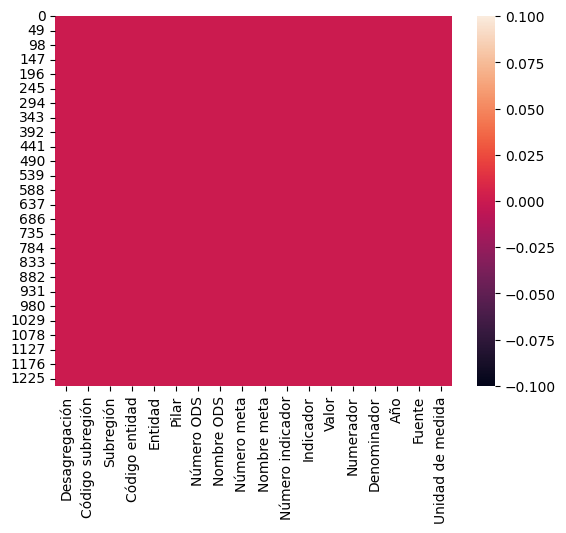

In [97]:
# Visualización con mapa de calor de los datos perdidos para las variables contenidas en el conjunto de datos
# En este caso los datos que contienen los valores para los indicadores de Incidencia de desnutrición aguda en población menor de 5 años
# y el indicador de Prevalencia de inseguridad alimentaria en el hogar (moderada o severa)

sns.heatmap(Indicators.isnull())

<Axes: >

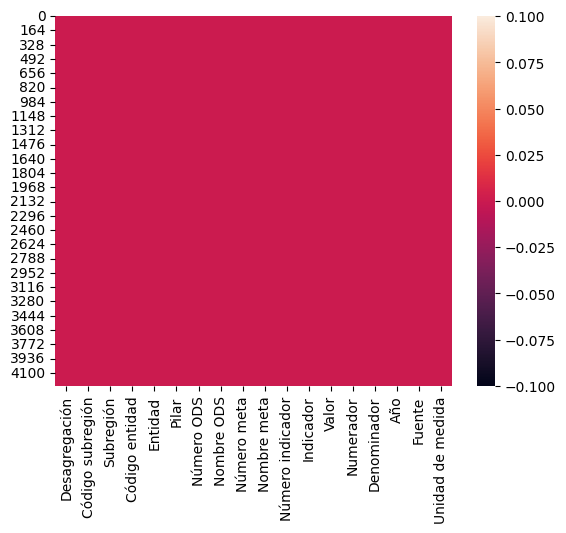

In [98]:
# Visualización con mapa de calor de los datos perdidos para las variables contenidas en el conjunto de datos
# En este caso los datos que contienen los valores para los indicadores de Cobertura de viviendas con agua potable
# el indicador de Cobertura de viviendas con energía eléctrica
# y el indicador de Cobertura en educación superior

sns.heatmap(Indicators2.isnull())

## Variables categóricas

In [104]:
# Identificación de las variables categóricas
# En este caso los datos que contienen los valores para los indicadores de Incidencia de desnutrición aguda en población menor de 5 años
# y el indicador de Prevalencia de inseguridad alimentaria en el hogar (moderada o severa)

catCols = Indicators.select_dtypes(include = ["object"]).columns.tolist()
Indicators[catCols]

,Desagregación,Código subregión,Subregión,Entidad,Pilar,Nombre ODS,Nombre meta,Número indicador,Indicador,Fuente,Unidad de medida
0,Municipal,SR08,Suroeste,Betania,Personas,Hambre cero,Acceso universal a alimentos seguros y nutrici...,2.1.1.P,Prevalencia de inseguridad alimentaria en el h...,DAP - Departamento Administrativo de Planeació...,Porcentaje
1,Municipal,SR08,Suroeste,Jericó,Personas,Hambre cero,Acceso universal a alimentos seguros y nutrici...,2.1.1.P,Prevalencia de inseguridad alimentaria en el h...,DAP - Departamento Administrativo de Planeació...,Porcentaje
2,Municipal,SR06,Occidente,Anzá,Personas,Hambre cero,Acceso universal a alimentos seguros y nutrici...,2.1.1.P,Prevalencia de inseguridad alimentaria en el h...,DAP - Departamento Administrativo de Planeació...,Porcentaje
3,Municipal,SR05,Norte,Belmira,Personas,Hambre cero,Acceso universal a alimentos seguros y nutrici...,2.1.1.P,Prevalencia de inseguridad alimentaria en el h...,DAP - Departamento Administrativo de Planeació...,Porcentaje
4,Municipal,SR06,Occidente,Sopetrán,Personas,Hambre cero,Acceso universal a alimentos seguros y nutrici...,2.1.1.P,Prevalencia de inseguridad alimentaria en el h...,DAP - Departamento Administrativo de Planeació...,Porcentaje
...,...,...,...,...,...,...,...,...,...,...,...
1245,Municipal,SR04,Nordeste,Remedios,Personas,Hambre cero,Terminar con todas las formas de desnutrición,2.2.2.P,Incidencia de desnutrición aguda en población ...,MinSalud - Sistema de Información para la Vigi...,Tasa por 100 mil menores de 5 años
1246,Municipal,SR08,Suroeste,Fredonia,Personas,Hambre cero,Terminar con todas las formas de desnutrición,2.2.2.P,Incidencia de desnutrición aguda en población ...,MinSalud - Sistema de Información para la Vigi...,Tasa por 100 mil menores de 5 años
1247,Municipal,SR07,Oriente,El Carmen de Viboral,Personas,Hambre cero,Terminar con todas las formas de desnutrición,2.2.2.P,Incidencia de desnutrición aguda en población ...,MinSalud - Sistema de Información para la Vigi...,Tasa por 100 mil menores de 5 años
1248,Municipal,SR06,Occidente,Santa Fé de Antioquia,Personas,Hambre cero,Terminar con todas las formas de desnutrición,2.2.2.P,Incidencia de desnutrición aguda en población ...,MinSalud - Sistema de Información para la Vigi...,Tasa por 100 mil menores de 5 años


In [105]:
# Identificación de las variables categóricas
# En este caso los datos que contienen los valores para los indicadores de Cobertura de viviendas con agua potable
# el indicador de Cobertura de viviendas con energía eléctrica
# y el indicador de Cobertura en educación superior

catCols = Indicators2.select_dtypes(include = ["object"]).columns.tolist()
Indicators2[catCols]

,Desagregación,Código subregión,Subregión,Entidad,Pilar,Nombre ODS,Nombre meta,Número indicador,Indicador,Fuente,Unidad de medida
0,Municipal,SR07,Oriente,Guatapé,Personas,Educación de calidad,Igualdad de acceso a educación técnica- vocaci...,4.3.1.C,Cobertura en educación superior,MinEducación - Sistema Nacional de Información...,Porcentaje
1,Municipal,SR01,Valle de Aburrá,Sabaneta,Personas,Educación de calidad,Igualdad de acceso a educación técnica- vocaci...,4.3.1.C,Cobertura en educación superior,MinEducación - Sistema Nacional de Información...,Porcentaje
2,Municipal,SR03,Magdalena Medio,Puerto Berrío,Personas,Educación de calidad,Igualdad de acceso a educación técnica- vocaci...,4.3.1.C,Cobertura en educación superior,MinEducación - Sistema Nacional de Información...,Porcentaje
3,Municipal,SR07,Oriente,La Ceja del Tambo,Personas,Educación de calidad,Igualdad de acceso a educación técnica- vocaci...,4.3.1.C,Cobertura en educación superior,MinEducación - Sistema Nacional de Información...,Porcentaje
4,Municipal,SR08,Suroeste,Urrao,Personas,Educación de calidad,Igualdad de acceso a educación técnica- vocaci...,4.3.1.C,Cobertura en educación superior,MinEducación - Sistema Nacional de Información...,Porcentaje
...,...,...,...,...,...,...,...,...,...,...,...
4245,Municipal,SR06,Occidente,Sabanalarga,Prosperidad,Energía asequible y no contaminante,Acceso universal a la energía moderna,7.1.1.C,Cobertura de viviendas con energía eléctrica,UPME - Unidad de Planeación Minero Energética-...,Porcentaje
4246,Municipal,SR01,Valle de Aburrá,Envigado,Prosperidad,Energía asequible y no contaminante,Acceso universal a la energía moderna,7.1.1.C,Cobertura de viviendas con energía eléctrica,UPME - Unidad de Planeación Minero Energética-...,Porcentaje
4247,Municipal,SR03,Magdalena Medio,Puerto Berrío,Prosperidad,Energía asequible y no contaminante,Acceso universal a la energía moderna,7.1.1.C,Cobertura de viviendas con energía eléctrica,UPME - Unidad de Planeación Minero Energética-...,Porcentaje
4248,Municipal,SR01,Valle de Aburrá,Sabaneta,Prosperidad,Energía asequible y no contaminante,Acceso universal a la energía moderna,7.1.1.C,Cobertura de viviendas con energía eléctrica,UPME - Unidad de Planeación Minero Energética-...,Porcentaje


## Variables numéricas

In [106]:
# Identificación de las varibles numéricas
# En este caso los datos que contienen los valores para los indicadores de Incidencia de desnutrición aguda en población menor de 5 años
# y el indicador de Prevalencia de inseguridad alimentaria en el hogar (moderada o severa)

numCols = Indicators.select_dtypes(include = ['float64','int64']).columns.tolist()
Indicators[numCols]

,Código entidad,Número ODS,Número meta,Valor,Numerador,Denominador,Año
0,5091,2,2.1,9.811121,281.735355,2871.591928,2017
1,5368,2,2.1,4.609214,212.530844,4611.000000,2017
2,5044,2,2.1,10.446802,273.340949,2616.503497,2017
3,5086,2,2.1,4.360848,86.126742,1975.000000,2017
4,5761,2,2.1,13.956997,959.822660,6877.000000,2017
...,...,...,...,...,...,...,...
1245,5604,2,2.2,96.587250,3.000000,3106.000000,2019
1246,5282,2,2.2,0.000000,0.000000,1383.000000,2019
1247,5148,2,2.2,60.253063,3.000000,4979.000000,2019
1248,5042,2,2.2,924.024641,18.000000,1948.000000,2019


In [107]:
# Identificación de las varibles numéricas
# En este caso los datos que contienen los valores para los indicadores de Cobertura de viviendas con agua potable
# el indicador de Cobertura de viviendas con energía eléctrica
# y el indicador de Cobertura en educación superior

numCols = Indicators2.select_dtypes(include = ['float64','int64']).columns.tolist()
Indicators2[numCols]

,Código entidad,Número ODS,Número meta,Valor,Numerador,Denominador,Año
0,5321,4,4.3,6.616541,44.0,665.0,2013
1,5631,4,4.3,99.945464,5498.0,5501.0,2013
2,5579,4,4.3,31.174993,1117.0,3583.0,2013
3,5376,4,4.3,12.952030,702.0,5420.0,2013
4,5847,4,4.3,6.606171,182.0,2755.0,2013
...,...,...,...,...,...,...,...
4245,5628,7,7.1,100.000000,3502.0,3502.0,2015
4246,5266,7,7.1,100.000000,76963.0,76963.0,2015
4247,5579,7,7.1,100.000000,12431.0,12431.0,2015
4248,5631,7,7.1,100.000000,29426.0,29426.0,2015


# Definición del conjunto de datos

In [108]:
# Se seleccionan las variables definitivas para el conjunto de datos
# En este caso los datos que contienen los valores para los indicadores de Incidencia de desnutrición aguda en población menor de 5 años
# y el indicador de Prevalencia de inseguridad alimentaria en el hogar (moderada o severa)

indicators_select = Indicators[['Código entidad','Entidad','Indicador','Valor','Año',]]
indicators_select

,Código entidad,Entidad,Indicador,Valor,Año
0,5091,Betania,Prevalencia de inseguridad alimentaria en el h...,9.811121,2017
1,5368,Jericó,Prevalencia de inseguridad alimentaria en el h...,4.609214,2017
2,5044,Anzá,Prevalencia de inseguridad alimentaria en el h...,10.446802,2017
3,5086,Belmira,Prevalencia de inseguridad alimentaria en el h...,4.360848,2017
4,5761,Sopetrán,Prevalencia de inseguridad alimentaria en el h...,13.956997,2017
...,...,...,...,...,...
1245,5604,Remedios,Incidencia de desnutrición aguda en población ...,96.587250,2019
1246,5282,Fredonia,Incidencia de desnutrición aguda en población ...,0.000000,2019
1247,5148,El Carmen de Viboral,Incidencia de desnutrición aguda en población ...,60.253063,2019
1248,5042,Santa Fé de Antioquia,Incidencia de desnutrición aguda en población ...,924.024641,2019


In [109]:
# Se seleccionan las variables definitivas para el conjunto de datos
# En este caso los datos que contienen los valores para los indicadores de Cobertura de viviendas con agua potable
# el indicador de Cobertura de viviendas con energía eléctrica
# y el indicador de Cobertura en educación superior

indicators2_select = Indicators2[['Código entidad','Entidad','Indicador','Valor','Año',]]
indicators2_select

,Código entidad,Entidad,Indicador,Valor,Año
0,5321,Guatapé,Cobertura en educación superior,6.616541,2013
1,5631,Sabaneta,Cobertura en educación superior,99.945464,2013
2,5579,Puerto Berrío,Cobertura en educación superior,31.174993,2013
3,5376,La Ceja del Tambo,Cobertura en educación superior,12.952030,2013
4,5847,Urrao,Cobertura en educación superior,6.606171,2013
...,...,...,...,...,...
4245,5628,Sabanalarga,Cobertura de viviendas con energía eléctrica,100.000000,2015
4246,5266,Envigado,Cobertura de viviendas con energía eléctrica,100.000000,2015
4247,5579,Puerto Berrío,Cobertura de viviendas con energía eléctrica,100.000000,2015
4248,5631,Sabaneta,Cobertura de viviendas con energía eléctrica,100.000000,2015


In [110]:
# Se construye el conjunto de datos definitivo
# Se hace un proceso de concatenación de los datos, uniendo ambos dataset con sus variables extraídas
# y obteniendo 5500 instancias como insumo para la experimentación en la definición del modelo predictivo

dataset = pd.concat([indicators_select, indicators2_select], axis=0).reset_index()
dataset

,index,Código entidad,Entidad,Indicador,Valor,Año
0,0,5091,Betania,Prevalencia de inseguridad alimentaria en el h...,9.811121,2017
1,1,5368,Jericó,Prevalencia de inseguridad alimentaria en el h...,4.609214,2017
2,2,5044,Anzá,Prevalencia de inseguridad alimentaria en el h...,10.446802,2017
3,3,5086,Belmira,Prevalencia de inseguridad alimentaria en el h...,4.360848,2017
4,4,5761,Sopetrán,Prevalencia de inseguridad alimentaria en el h...,13.956997,2017
...,...,...,...,...,...,...
5495,4245,5628,Sabanalarga,Cobertura de viviendas con energía eléctrica,100.000000,2015
5496,4246,5266,Envigado,Cobertura de viviendas con energía eléctrica,100.000000,2015
5497,4247,5579,Puerto Berrío,Cobertura de viviendas con energía eléctrica,100.000000,2015
5498,4248,5631,Sabaneta,Cobertura de viviendas con energía eléctrica,100.000000,2015


In [111]:
# Descrición del dataset definitivo
# Obteniendo una viasualización previa de mediciones estadísticas, principalmente para el año que va desde 2010 hasta 2022

dataset.describe()

,index,Código entidad,Valor,Año
count,5500.000000,5500.000000,5500.000000,5500.000000
mean,1783.590909,5415.744000,72.926176,2016.681818
std,1260.214915,279.752383,130.659285,3.410007
min,0.000000,5001.000000,0.000000,2010.000000
25%,687.000000,5147.000000,5.593700,2014.000000
50%,1499.500000,5376.000000,47.003653,2017.000000
75%,2874.250000,5659.000000,100.000000,2019.250000
max,4249.000000,5895.000000,3533.568905,2022.000000


# Lectura y visualización del conjunto de datos

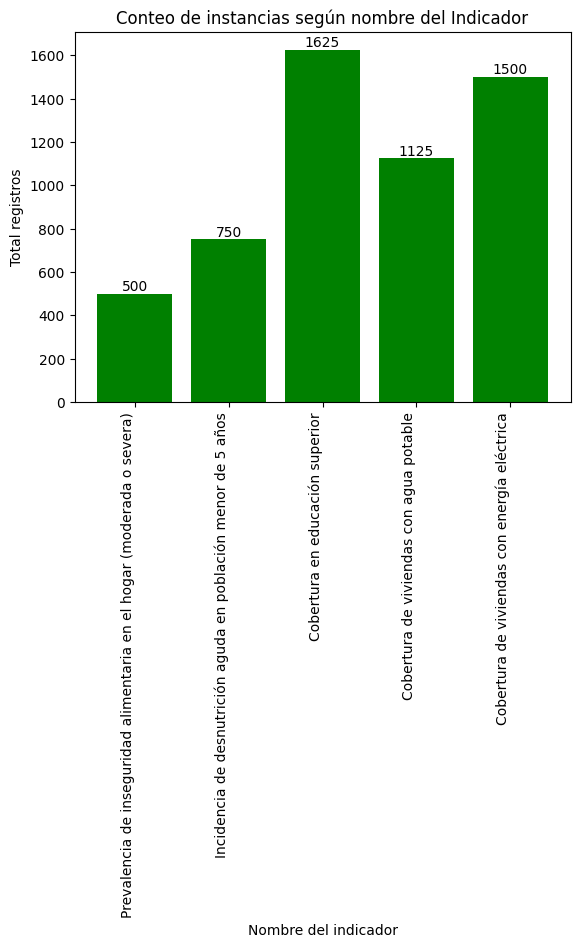

In [112]:
# Selección del nombre del indicador para su visualización gráfica
nomindicador = dataset['Indicador']

# Calcular el conteo de cada indicador y asignar valores para su viasualización
conteo_nomindicador = Counter(nomindicador)
categorias = list(conteo_nomindicador.keys())
valores = list(conteo_nomindicador.values())

# Gráfico de barras con el conteo de registros para cada indicador
plt.bar(categorias, valores, color = 'green')
plt.xlabel('Nombre del indicador')
plt.ylabel('Total registros')
plt.title('Conteo de instancias según nombre del Indicador')
plt.xticks(rotation = 90, ha = 'right')
for i, valor in enumerate(valores): # Etiquetas para cada indicador
    plt.text(i, valor + 0.1, str(valor), ha = 'center', va = 'bottom')
plt.show()


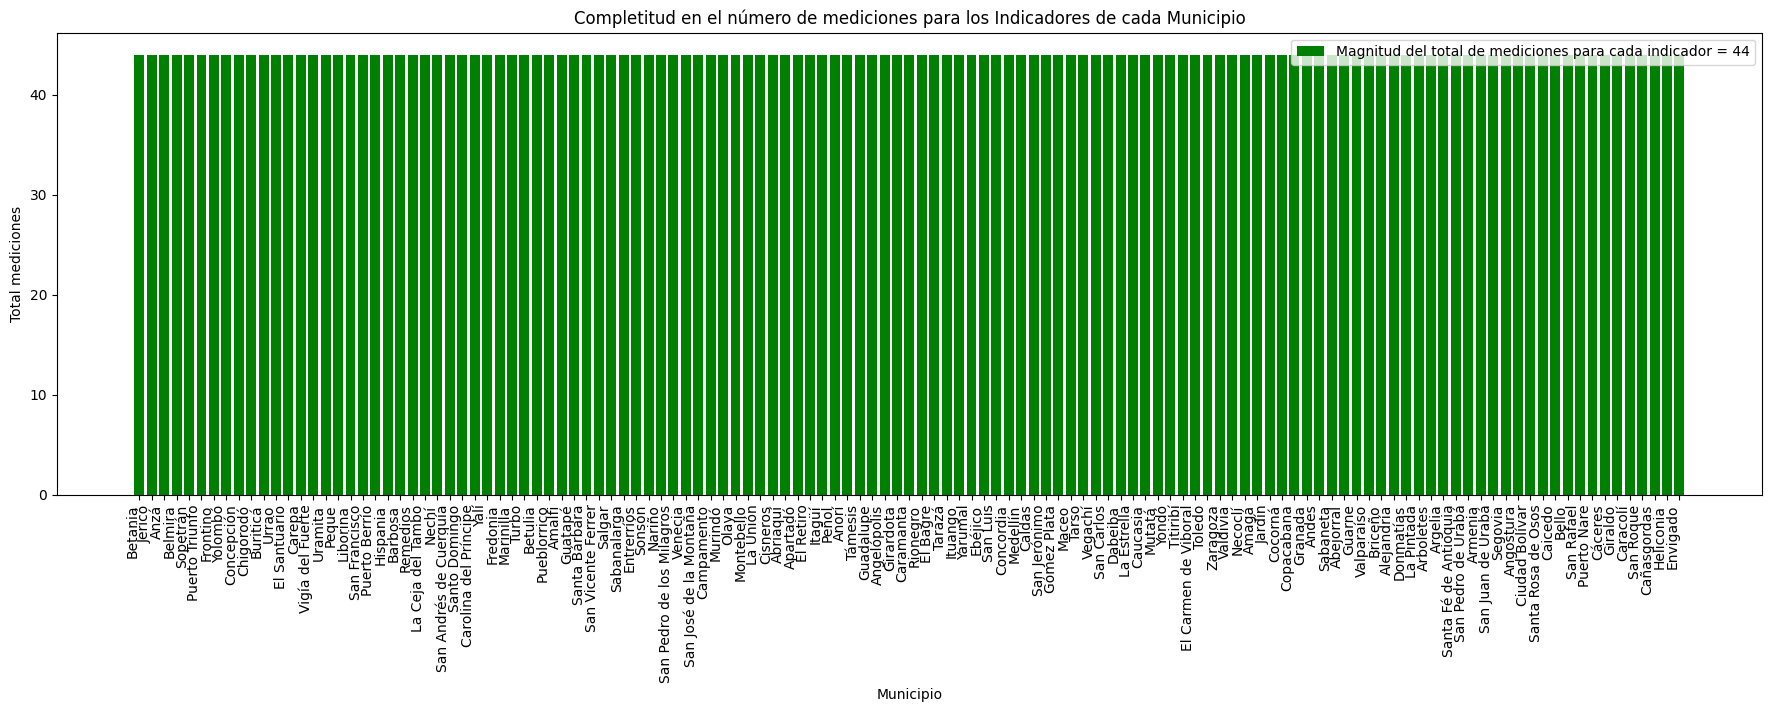

In [113]:
# Selección del nombre del municipio para su visualización gráfica
categorias = dataset['Entidad']

# Calcular el conteo de cada indicador (número de mediciones) y asignar valores para su viasualización
conteo_categorias = Counter(categorias)
df = pd.DataFrame(list(conteo_categorias.items()), columns = ['Municipio', 'Total mediciones'])

# Gráfico de barras con el conteo de registros para cada indicador
plt.figure(figsize = (22, 6))
barra = plt.bar(df['Municipio'], df['Total mediciones'], color = 'green', label = 'Magnitud del total de mediciones para cada indicador = 44')
plt.xlabel('Municipio')
plt.ylabel('Total mediciones')
plt.title('Completitud en el número de mediciones para los Indicadores de cada Municipio')
plt.xticks(rotation = 90, ha = 'right')  # Ajusta el ángulo y la alineación según tus preferencias
plt.legend(loc = 'upper right')  # Ubicación de la leyenda
plt.show()

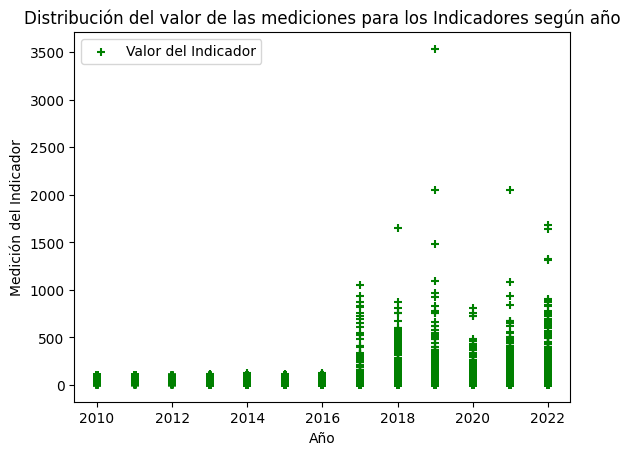

In [114]:
# Datos de ejemplo (reemplázalos con tus propios datos)
x = dataset['Año']
y = dataset['Valor']

# Gráfico de dispersión con la identificación del año y la distribución del valor de las mediciones para los Indicadores
plt.scatter(x, y, color = 'green', marker = '+', label = 'Valor del Indicador')
plt.xlabel('Año')
plt.ylabel('Medición del Indicador')
plt.title('Distribución del valor de las mediciones para los Indicadores según año')
plt.legend()
plt.show()


# Exportación del conjunto de datos

In [115]:
# Se exportan los datos estructurados en el dataset como un arcvhivo plano CSV

dataset.to_csv('dataset_municipios-DN.csv')
files.download('dataset_municipios-DN.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>